In [25]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt

In [26]:
ticker = 'AAPL'
end_date = date.today()
start_date = end_date - timedelta(days=10 * 365)
data = yf.download(ticker, start=start_date, end=end_date)
close_price = data[['Close']]
print("--- Data for the last 10 years ---")
print(f"Fetched {len(close_price)} data points from {start_date} to {end_date}.")
print("\n--- Start of the data ---")
print(close_price.head())
print("\n--- End of the data ---")
print(close_price.tail())

C:\Users\sachi\AppData\Local\Temp\ipykernel_380\2454190501.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

--- Data for the last 10 years ---
Fetched 2513 data points from 2015-09-21 to 2025-09-18.

--- Start of the data ---
Price           Close
Ticker           AAPL
Date                 
2015-09-21  25.890635
2015-09-22  25.483881
2015-09-23  25.690630
2015-09-24  25.843439
2015-09-25  25.778267

--- End of the data ---
Price            Close
Ticker            AAPL
Date                  
2025-09-11  230.029999
2025-09-12  234.070007
2025-09-15  236.699997
2025-09-16  238.149994
2025-09-17  238.990005


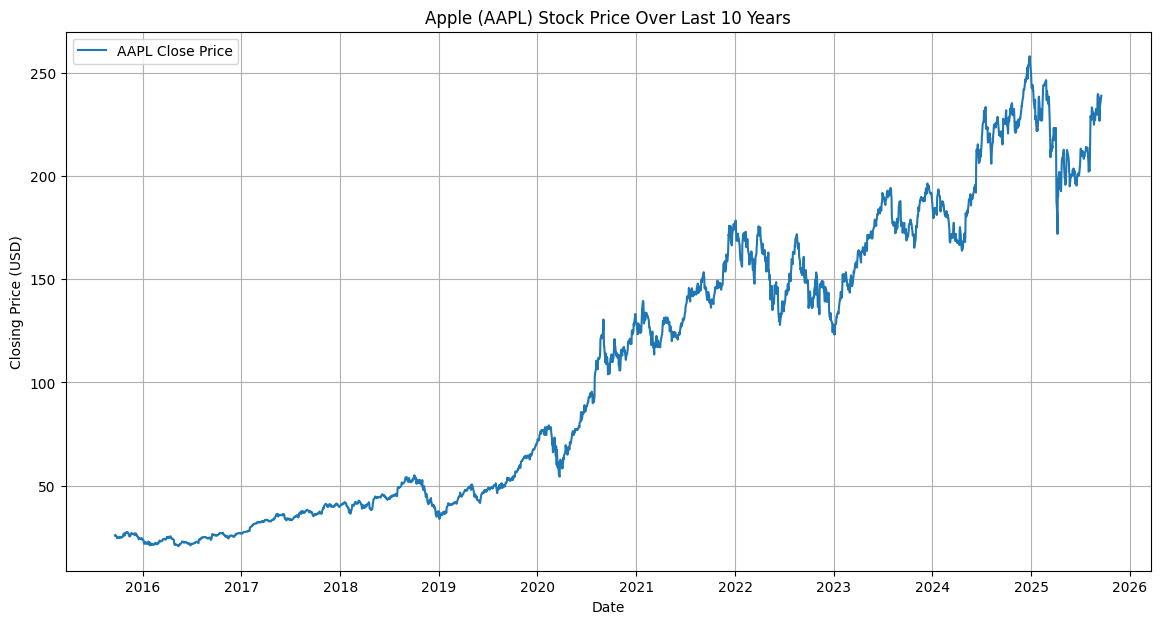

In [27]:
close_price_np = close_price.values
plt.figure(figsize=(14, 7))
plt.plot(close_price.index, close_price['Close'], label='AAPL Close Price')
plt.title('Apple (AAPL) Stock Price Over Last 10 Years')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
print(np.shape(close_price_np))

(2513, 1)


In [32]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [33]:
result = adfuller(close_price['Close'].dropna())
p_value = result[1]

print('--- ADF Test on Original Data ---')
print(f'p-value: {p_value}')
if p_value <= 0.05:
    print("Conclusion: The series is stationary.")
else:
    print("Conclusion: The series is non-stationary.")

--- ADF Test on Original Data ---
p-value: 0.9563975866724952
Conclusion: The series is non-stationary.
